In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
#torch.manual_seed(42)

# Applying Manual Classifier just by using Math
Using MNIST Dataset

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [5]:
#We are only training classifier which can classify 3 and 7
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
print("np:\n", array(im3)[4:10, 6:12])
print("tensor:\n", tensor(im3)[4:10, 6: 12])
im3

np:
 [[  0   0   0   0   0   0]
 [  0   0   0  29 150 195]
 [  0  48 166 224 253 253]
 [244 249 253 187  46  10]
 [253 253 230  48   0   0]
 [ 20  20  15   0   0   0]]
tensor:
 tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  29, 150, 195],
        [  0,  48, 166, 224, 253, 253],
        [244, 249, 253, 187,  46,  10],
        [253, 253, 230,  48,   0,   0],
        [ 20,  20,  15,   0,   0,   0]], dtype=torch.uint8)


In [8]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## How to identify if its a 3 or 7?
We can take average of all images in the folder for 3 and 7 individually; the resultant would be average or 'ideal 3' or 'ideal 7'. And later we will classify the digit is 3 or 7 by taking the difference to the ideal digits.

In [9]:
# Collecting all threes and sevens into one tensor
three_tensor = [tensor(Image.open(o)) for o in threes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
len(three_tensor), len(seven_tensor)

(6131, 6265)

<Axes: >

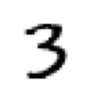

In [10]:
show_image(three_tensor[1])

In [11]:
# stacking all the tensors into single tensor and normalising the values inside it
stacked_threes = torch.stack(three_tensor).float()/255
stacked_sevens = torch.stack(seven_tensor).float()/255
print(stacked_threes.shape, stacked_threes[1].shape)
stacked_threes[1]  # all values has been normalised

torch.Size([6131, 28, 28]) torch.Size([28, 28])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0

In [12]:
torch.randn(1, 3).ndim

2

In [13]:
torch.randn(12,3).ndim

2

<Axes: >

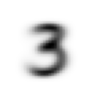

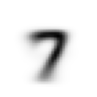

In [14]:
# calc mean of all tensors
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3)
show_image(mean7)

Absolute white and absolute black are the regions where all images agree that the digit is 3 or 7.

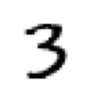

In [15]:
# Picking random 3
a_3 = stacked_threes[1]
show_image(a_3);

## Creating a loss function

In [16]:
# These would have low error since the digit we are trying to classify is 3
dist_3_abs = (a_3-mean3).abs().mean()
dist_3_sqrt = ((a_3-mean3)**2).mean().sqrt()
# These would have high error since we are comparing 3 to ideal7
dist_7_abs = (a_3-mean7).abs().mean()
dist_7_sqrt = ((a_3-mean7)**2).mean().sqrt()

print(dist_3_abs, dist_3_sqrt, dist_7_abs, dist_7_sqrt)

tensor(0.1114) tensor(0.2021) tensor(0.1586) tensor(0.3021)


In [17]:
# Same can be calculated with pytorch funtions
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

##  Calculating Metrics

In [18]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [19]:
# Creating a mnist distance function which is nothing but l1_loss
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [20]:
# Calculating distance for the entire validation set
# We are supplying [1010, 28, 28] shaped tensor to be calculated with [28 * 28]
# PyTorch automatically broadcasts the mean3 tensor to the same number of valid set
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1368, 0.1636, 0.1174,  ..., 0.1208, 0.1390, 0.1203]),
 torch.Size([1010]))

In [21]:
# Putting everything together
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [22]:
# Prediction
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Above is true since difference between `ideal3` and `a_3` is lower than `ideal7` and `a_7`

In [23]:
# Validation set
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [24]:
accuracy_3s =     is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - is_3(valid_7_tens).float().mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Stochastic Gradient Descent (SGD)
`x` is an image which is represented as vector ie, rows stacked up end to end. `w` is the weight vector for each pixel.

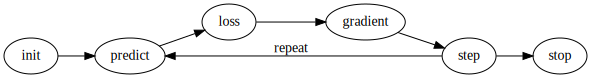

In [25]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

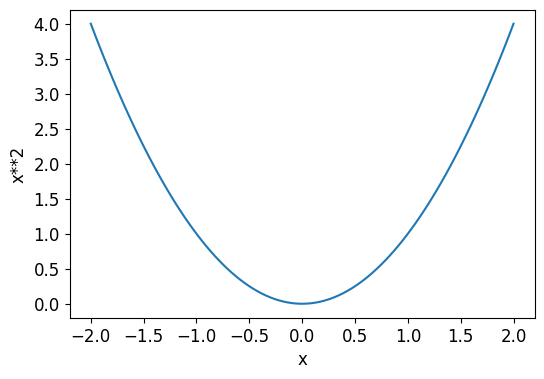

In [26]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')

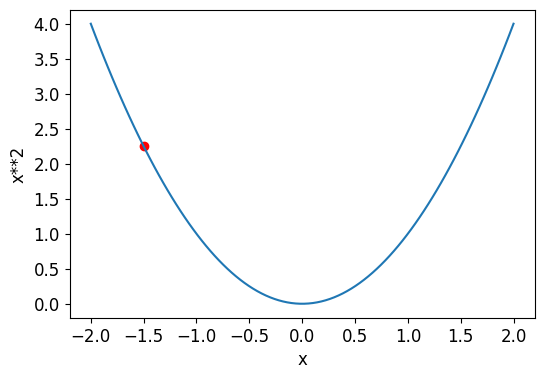

In [27]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [28]:
# pytorch tags this variable to automatically compute the derivative of newarly all function.
xt= tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [29]:
yt.backward()
xt.grad

tensor(6.)

In [30]:
# Calculating gradients for other tensor
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [31]:
def f(x): return(x**2).sum()
yt = f(xt)
print(yt)
yt.backward()
xt.grad

tensor(125., grad_fn=<SumBackward0>)


tensor([ 6.,  8., 20.])

# Generic SDG Mechanism (End-To-End Mechanism)

In [32]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

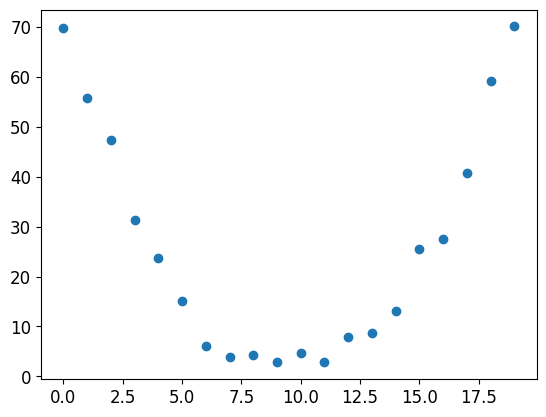

In [33]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [34]:
# We are assuming that the speed of the roller coaster is in quadratic form
def f(t, params):
  a,b,c = params
  return a*(t**2) + b*t + c

In [35]:
# loss function
# For continous data the MSE is used commonly
def mse(preds, targets): return ((preds-targets)**2).mean()

In [36]:
# STEP 1: Intializing the parameters
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [37]:
# STEP 2: Calculate the predictions
preds = f(time, params)

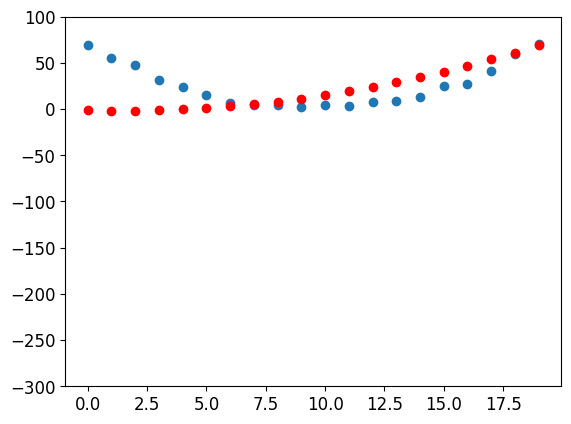

In [38]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

show_preds(preds)

In [39]:
## STEP 3: Caclulate loss
loss = mse(preds, speed)
loss

tensor(744.0345, grad_fn=<MeanBackward0>)

In [40]:
## STEP 4: Calculate gradient
loss.backward()
params.grad

tensor([2472.2263,  147.8687,  -10.4974])

In [41]:
## STEP 5: Stepping
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [42]:
## STEP 6: Iterate
preds = f(time, params)
loss = mse(preds, speed)
loss

tensor(700.0220, grad_fn=<MeanBackward0>)

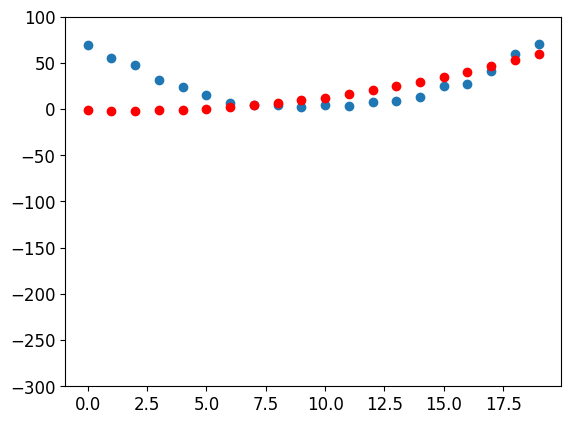

In [43]:
show_preds(preds)

In [44]:
def apply_step(params, prn = True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad
  params.grad = None
  if prn: print(loss.item())
  return preds

In [45]:
for i in range(10): apply_step(params)

700.0220336914062
691.68896484375
690.107421875
689.8035888671875
689.7413940429688
689.7249755859375
689.71728515625
689.7111206054688
689.7054443359375
689.69970703125


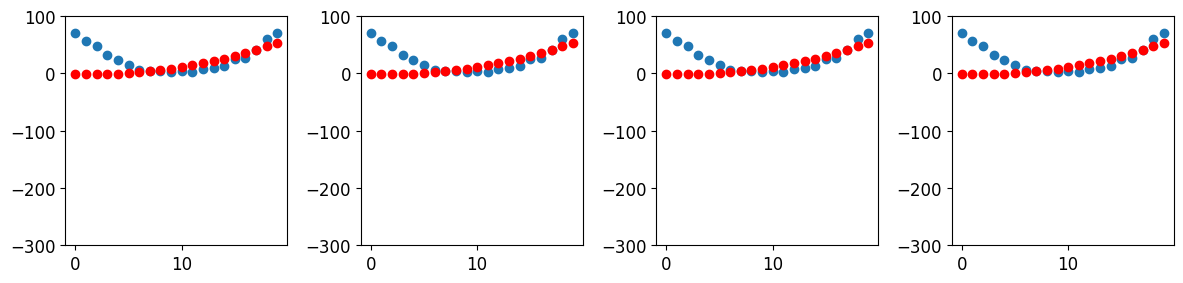

In [46]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

We have stopped after 10 epochs arbitarily.

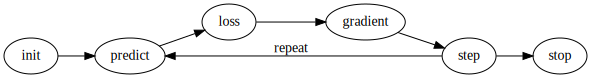

In [47]:
#hide_input
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

# MNIST Loss Function
Converting our rank-3 tensor ie, stacked_3s and stacked_7s into rank-2 tensor; view is used to set the length of tensor; -1 states that tensor can be as big as it needs to fit all the data

In [48]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28 * 28)

In [49]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

Dataset in PyTorch is required to return a tuple of (x,y) when indexed. We can use zip function which combines list

In [50]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x,y

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

Repeating the same for validation set

In [51]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [52]:
# Initailizing random parameters
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [53]:
weights = init_params(28*28, 1)
bias = init_params(1)
weights, bias

(tensor([ 6.4076e-01,  5.8325e-01,  1.0669e+00, -4.5015e-01, -6.7875e-01,  5.7432e-01,  1.8775e-01, -3.5762e-01,  2.6491e-01,  1.2732e+00, -1.3109e-03, -3.0360e-01, -9.8644e-01,  1.2330e-01,
          3.4987e-01,  6.1728e-01,  7.2618e-01,  9.1152e-02, -3.8907e-01,  5.2792e-01,  1.0311e+00, -7.0477e-01,  1.0131e+00, -3.3082e-01,  1.0950e+00,  3.3989e-01,  7.1997e-01,  4.1141e-01,
         -5.7332e-01,  5.0686e-01, -4.7521e-01, -4.9203e-01, -1.3603e-01,  1.6354e+00,  6.5474e-01,  5.7600e-01, -3.6091e-01, -6.0590e-02,  7.3255e-02,  8.1865e-01, -3.7534e-01,  1.0331e+00,
         -6.8665e-01,  6.3681e-01,  2.1755e-01, -4.6655e-02, -1.4335e+00, -5.6653e-01,  2.6948e-01, -2.1038e-01, -7.3280e-01,  1.0430e-01,  1.0414e+00, -3.9973e-01, -2.2933e+00,  4.9756e-01,
         -2.4801e+00, -4.1754e-01, -1.1955e+00,  8.1234e-01, -3.0628e-01, -3.3016e-01, -9.8080e-01,  1.9473e-01,  2.8683e-01, -7.3084e-01,  1.7482e-01, -1.0939e+00,  9.6334e-01, -3.0953e-01,
          5.7120e-01,  1.1179e+00, -1.5469e+0

In [54]:
# Transversed Tensore
weights.T

<ipython-input-54-72ffbe9a635b>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  weights.T


tensor([ 6.4076e-01,  5.8325e-01,  1.0669e+00, -4.5015e-01, -6.7875e-01,  5.7432e-01,  1.8775e-01, -3.5762e-01,  2.6491e-01,  1.2732e+00, -1.3109e-03, -3.0360e-01, -9.8644e-01,  1.2330e-01,
         3.4987e-01,  6.1728e-01,  7.2618e-01,  9.1152e-02, -3.8907e-01,  5.2792e-01,  1.0311e+00, -7.0477e-01,  1.0131e+00, -3.3082e-01,  1.0950e+00,  3.3989e-01,  7.1997e-01,  4.1141e-01,
        -5.7332e-01,  5.0686e-01, -4.7521e-01, -4.9203e-01, -1.3603e-01,  1.6354e+00,  6.5474e-01,  5.7600e-01, -3.6091e-01, -6.0590e-02,  7.3255e-02,  8.1865e-01, -3.7534e-01,  1.0331e+00,
        -6.8665e-01,  6.3681e-01,  2.1755e-01, -4.6655e-02, -1.4335e+00, -5.6653e-01,  2.6948e-01, -2.1038e-01, -7.3280e-01,  1.0430e-01,  1.0414e+00, -3.9973e-01, -2.2933e+00,  4.9756e-01,
        -2.4801e+00, -4.1754e-01, -1.1955e+00,  8.1234e-01, -3.0628e-01, -3.3016e-01, -9.8080e-01,  1.9473e-01,  2.8683e-01, -7.3084e-01,  1.7482e-01, -1.0939e+00,  9.6334e-01, -3.0953e-01,
         5.7120e-01,  1.1179e+00, -1.5469e+00,  7.

## Neural Network
 In neural networks, the `w` in the rectified linear equation is called the weights, and the `b` is called the bias. Together, the weights and bias make up the parameters.

Multiplying Single input with the weights to get the

In [55]:
# Calculating a prediction for one image
(train_x[0] * weights.T).sum() + bias

tensor([7.5145], grad_fn=<AddBackward0>)

#### Matrix Multiplication

In [56]:
 def linear1(xb): return xb@weights + bias
 preds = linear1(train_x)
 preds

tensor([ 7.5145, 12.6291,  8.7788,  ..., -9.0516,  1.0111, -5.5140], grad_fn=<AddBackward0>)

The first image prediction is same to the one done before the matrix multiplication.
`batch@weights + bias` Important Fundamental Equation (linear function) for neural network and other is Activation funtion or non linear function\
Here the prediction is done with broadcasting hence the same set of weights are applied to all images

In [57]:
# Matching the prediction and actual observation; if they are same or not
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        ...,
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True]])

In [58]:
# Taking mean of this would give the ACCURACY
corrects.float().mean().item()

0.49961191415786743

## Manual Modification of weight
Checking if there's any change after modifying the weight

In [59]:
# Modifing the first weight ie, weight assigned to the first pixel
weights[0]

tensor(0.6408, grad_fn=<SelectBackward0>)

In [60]:
with torch.no_grad(): weights[0] *=1.001

In [61]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.49961191415786743

## Search for loss function
To modify our weights we need gradients; which represent instantaneous change for loss function (in case of neural network).
We can use accuracy as our loss function; but there is a technical issue which causes our gradient to be flat for almost whole prediction and infinity at the meeting.

Since our prediction didn't improved after steeping, the gradient is 0 as the change seems to be 0.

Let's take a case based example to solve the above issue:

In [62]:
trgts = tensor([1,0,1]) ## labels
preds = tensor([0.9, 0.4, 0.2])

In [63]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [64]:
# Comparing loss with two different preds
preds = tensor([0.9, 0.4, 0.2])
preds2 = tensor([0.9, 0.4, 0.8])

print(mnist_loss(preds, trgts), mnist_loss(preds2, trgts))

tensor(0.4333) tensor(0.2333)


The loss has changed but it's not significant as it assumes that predictions are always in 0 to 1 range. We have to make sure that this is the case.

### Sigmoid Function or Non linear Activation function
Sigmoid always returns number between 0 and 1

In [65]:
def sigmoid(x): return 1/(1+ torch.exp(-x))

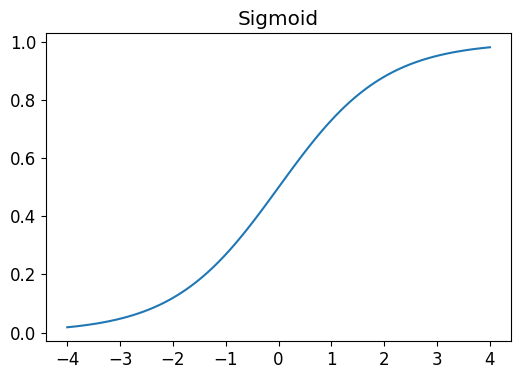

In [66]:
plot_function(torch.sigmoid, title = 'Sigmoid', min = -4, max = 4)

In [67]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

This allows us to create a smooth loss graph which gives us a good gradient instead of a gradient with large slopes and flats. Here our search for loss functions which is more sensitive and gives us a better result ends.

## Batches and Mini Batch

In [68]:
#DataLoader in PyTorch/fastAI tuns a list into a mini-batches and also shuffles them
coll = range(12)
dl = DataLoader(coll, batch_size = 5, shuffle= True)
list(dl)

[tensor([3, 8, 2, 4, 7]), tensor([11,  5,  1, 10,  0]), tensor([6, 9])]

For training, we require input and labels so, pytorch offers `dataset` tuple which can hold the information.
When `DataSet` is passed into `DataLoader` it splits into mini batches of tuples consisting dependent and independent variable

In [69]:
ds = L(enumerate(string.ascii_lowercase))
print(ds)

dl = DataLoader(ds, batch_size = 5, shuffle= True)
list(dl)

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j'), (10, 'k'), (11, 'l'), (12, 'm'), (13, 'n'), (14, 'o'), (15, 'p'), (16, 'q'), (17, 'r'), (18, 's'), (19, 't'), (20, 'u'), (21, 'v'), (22, 'w'), (23, 'x'), (24, 'y'), (25, 'z')]


[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

# Putting all together

Initial preparation of parameters and data.

In [70]:
# Initialize the weights
weights = init_params((28*28, 1))
bias = init_params(1)

In [72]:
%%capture
!pip install nbdev

In [73]:
doc(first)

In [ ]:
# Creating DataLoader(batches) from dset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
## Same for validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

### Testing workflow for 4 batch items

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
# make prediction
preds = linear1(batch)
preds

tensor([[-6.6780],
        [-8.7128],
        [-7.3242],
        [-7.0189]], grad_fn=<AddBackward0>)

In [ ]:
# Cacl loss
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9993, grad_fn=<MeanBackward0>)

In [ ]:
# Calculate gradients
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0001), tensor([-0.0007]))

In [ ]:
## Put all of the above into function
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0002), tensor([-0.0015]))

When we run loss.backward() or backward proporgation multiple times, the gradients are being added. Hence we need to reset them at the end of each iteration.

In [ ]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [ ]:
# Step the parameters and complete the training
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
# Batch accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [ ]:
# Running model over Validation set
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.3539

*Lets train for one epoch*

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.628

In [ ]:
# Trainning Loop for number of times.
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.7805 0.8821 0.9153 0.932 0.9349 0.9461 0.95 0.9539 0.9549 0.9564 0.9583 0.9598 0.9618 0.9622 0.9627 0.9637 0.9652 0.9667 0.9681 0.9691 

## Creating Optimizer
Using PyTorch module to build Neural Network

In [ ]:
linear_model = nn.Linear(28*28, 1)

In [ ]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self, params, lr): self.params, self.lr = list(params), lr
  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr
  def zero_grad(self, *arg, **kwargs):
    for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
# Train epoch
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.4932

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 

In [ ]:
linear_model = nn.Linear(28*28, 1)
opt  = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.9145 0.8008 0.9062 0.9306 0.9443 0.9541 0.9619 0.9643 0.9668 0.9692 0.9712 0.9731 0.9746 0.9755 0.976 0.9775 0.9775 0.9785 0.9785 

Using the same with fastAI Library

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636856,0.503651,0.495584,00:00
1,0.596260,0.160362,0.876349,00:00
2,0.216385,0.199106,0.818449,00:00
3,0.093193,0.111048,0.910697,00:00
4,0.047861,0.079654,0.932287,00:00
5,0.030258,0.063328,0.946025,00:00
6,0.023103,0.053282,0.954858,00:00
7,0.019990,0.046626,0.961236,00:00
8,0.018458,0.041969,0.965162,00:00
9,0.017566,0.038557,0.967615,00:00
